## Python

I prefer Python. The reason being that I am mostly analyzing data and building machine learning models. In my experience, Python is the best model to this field hence, my preference.

In this project, I used Python on google colaboratory to classify the liklihood of women having diabetes given some varaiables or feeatures such as pregnancies, glucose,bloodpressure etc.

My model returned an accuracy of $79\%$.

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Checking the target variable for insights

In [ ]:
df.Outcome.isnull().any(), df.Outcome.unique()

(False, array([1, 0]))

Let's observe the variables

In [ ]:
df.shape

(768, 9)

Is there null values in any of the variables?

In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


There doesn't seem to be outliers. Let's now build our classfication models

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [ ]:
X = df.drop('Outcome', axis=1)
Y = df.Outcome

Scaler = MinMaxScaler()
x_scaled = Scaler.fit_transform(X)

In [ ]:
random_seed = 10
x_train, x_test, y_train, y_test = train_test_split(x_scaled, Y, test_size=0.15, random_state=random_seed)

In [ ]:
x_test.shape, x_train.shape

((116, 8), (652, 8))

Lets train out machine learning models

In [ ]:
rdf = RandomForestClassifier(random_state = random_seed)
rdf.fit(x_train, y_train)
rdf.score(x_test, y_test)

0.7758620689655172

In [ ]:
logistic = LogisticRegression(random_state = random_seed)
logistic.fit(x_train, y_train)
logistic.score(x_test, y_test)

0.7327586206896551

In [ ]:
tree = ExtraTreesClassifier(random_state = random_seed)
tree.fit(x_train, y_train)
tree.score(x_test, y_test)

0.7155172413793104

In [ ]:
model_params = {
    'svm': {
        'model': SVC(),
        'params' : {
            'C': [0.1, 1,10,20],
            'kernel': ['linear', 'rbf', 'poly'],
            'gamma': [0.1, 1, 'scale', 'auto'],
        }
    },

    'random_forest': {
        'model': RandomForestClassifier(),
    'params': {'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
    }
        },

    'logistic_regression' : {
        'model': LogisticRegression(),
        'params': {
            'C': [0.001, 0.01, 0.1, 0.5, 1, 10,50, 100],
            'penalty': ['l1', 'l2'],
            'solver': ['liblinear', 'lbfgs', 'saga', 'newton-cg']
        }
    },

    'xgboost' : {
        'model': XGBClassifier(),
        'params': {
            'n_estimators': [100, 200, 300],
            'max_depth': [3, 4, 5],
            'learning_rate': [0.1, 0.01, 0.001],
            'subsample': [0.8, 0.9, 1.0]
        }
    },

    'extra_tree' : {
        'model': ExtraTreesClassifier(),
        'params': {
            'n_estimators': [100, 200, 300],
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
        },
        'decision_tree' : {
        'model': DecisionTreeClassifier(),
        'params': {
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }

    }

}

In [ ]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(x_scaled, Y)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

df = pd.DataFrame(scores,columns=['model','best_score','best_params'])


In [ ]:
df

,model,best_score,best_params
0,svm,0.781266,"{'C': 10, 'gamma': 1, 'kernel': 'poly'}"
1,random_forest,0.778728,"{'max_depth': None, 'min_samples_leaf': 4, 'mi..."
2,logistic_regression,0.772193,"{'C': 50, 'penalty': 'l2', 'solver': 'liblinear'}"
3,xgboost,0.774815,"{'learning_rate': 0.01, 'max_depth': 5, 'n_est..."
4,extra_tree,0.783881,"{'max_depth': 20, 'min_samples_leaf': 2, 'min_..."
5,decision_tree,0.730592,"{'max_depth': 20, 'min_samples_leaf': 1, 'min_..."


In [ ]:
svm = SVC(C = 10, gamma = 1, kernel = 'poly',random_state = random_seed)

random_forest = RandomForestClassifier(max_depth = None, min_samples_leaf =4,
min_samples_split =5, n_estimators =200,random_state = random_seed)

logistic_regression = LogisticRegression(C =50, penalty ='l2', solver ='liblinear',random_state = random_seed)

xgboost = XGBClassifier(learning_rate =0.01, max_depth =5, n_estimators =200, subsample =0.8,
                        random_state = random_seed)

extra_tree = ExtraTreesClassifier(max_depth = 20, min_samples_leaf = 2, min_samples_split = 2,
                                  n_estimators = 200,random_state = random_seed)

decision_tree = DecisionTreeClassifier(max_depth = 20, min_samples_leaf =1,  min_samples_split = 2,
                                       random_state=random_seed)


best_models = {'svm':svm, 'random_forest': random_forest, 'logistic_regression':logistic_regression,
               'xgboost': xgboost, 'extra_tree':extra_tree, 'decision_tree':decision_tree}


In [ ]:
for key, model in best_models.items():
  model.fit(x_train, y_train)
  print(key,':',  model.score(x_test, y_test))
  print(   )

svm : 0.7586206896551724

random_forest : 0.7586206896551724

logistic_regression : 0.7758620689655172

xgboost : 0.7931034482758621

extra_tree : 0.75

decision_tree : 0.7241379310344828



Ok, we go with xgboost classifier

In [ ]:
xgboost.score(x_train, y_train)

0.8788343558282209

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


In [ ]:
y_pred = xgboost.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[68,  6],
       [18, 24]])

<Axes: >

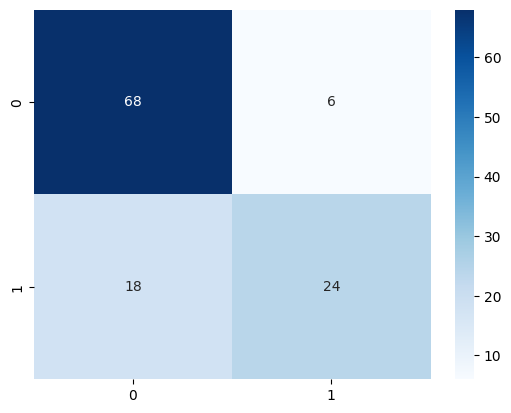

In [ ]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

From the confusion matrix above,  more of the errors in classification is coming from the '1' columns: 18 points of the '1' were misclassified hence the accurancy of $79 \% $

In conclusion, our data sample is small and to be able to get a good performance, we should collect more data.